In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cargar_dataset(file_path):
    dataset = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
    return dataset

In [3]:
def eliminar_columnas(df, columns_to_drop):
    df_cleaned = df.drop(columns=columns_to_drop)
    print(f"Columnas eliminadas: {columns_to_drop}")
    return df_cleaned

In [4]:
file_path = 'data_rain.csv'  
columns_to_drop = [
    'Date', 'Location', 'MinTemp', 'MaxTemp', 'Humidity9am', 
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
    'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'
]

In [5]:
dataset = cargar_dataset(file_path)
dataset_cleaned = eliminar_columnas(dataset, columns_to_drop)
dataset_cleaned.head()

Dataset cargado correctamente.
Columnas eliminadas: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0
1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0
2,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0
3,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0
4,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0


In [6]:
def filtrar_y_convertir_direccion(df, columnas_a_filtrar, columna_direccion, diccionario_conversion):

    df_filtrado = df[columnas_a_filtrar].copy()
    df_filtrado[f'{columna_direccion}Degrees'] = df_filtrado[columna_direccion].map(diccionario_conversion)
    return df_filtrado

In [7]:
wind_direction_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 
    'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 
    'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
columnas_a_filtrar = ['Rainfall', 'WindGustDir', 'WindGustSpeed']

In [8]:
filtered_dataset = filtrar_y_convertir_direccion(
    dataset, 
    columnas_a_filtrar, 
    'WindGustDir', 
    wind_direction_to_degrees
)

In [9]:
filtered_dataset.head()

,Rainfall,WindGustDir,WindGustSpeed,WindGustDirDegrees
0,0.6,W,44.0,270.0
1,0.0,WNW,44.0,292.5
2,0.0,WSW,46.0,247.5
3,0.0,NE,24.0,45.0
4,1.0,W,41.0,270.0


In [10]:
def verificar_y_resumir_dataset(df):

    print("\nValores nulos por columna en el dataset:")
    print(df.isnull().sum())

    print("\nInformación del dataset:")
    print(df.info())

verificar_y_resumir_dataset(filtered_dataset)


Valores nulos por columna en el dataset:
Rainfall               3261
WindGustDir           10326
WindGustSpeed         10263
WindGustDirDegrees    10326
dtype: int64

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rainfall            142199 non-null  float64
 1   WindGustDir         135134 non-null  object 
 2   WindGustSpeed       135197 non-null  float64
 3   WindGustDirDegrees  135134 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.4+ MB
None


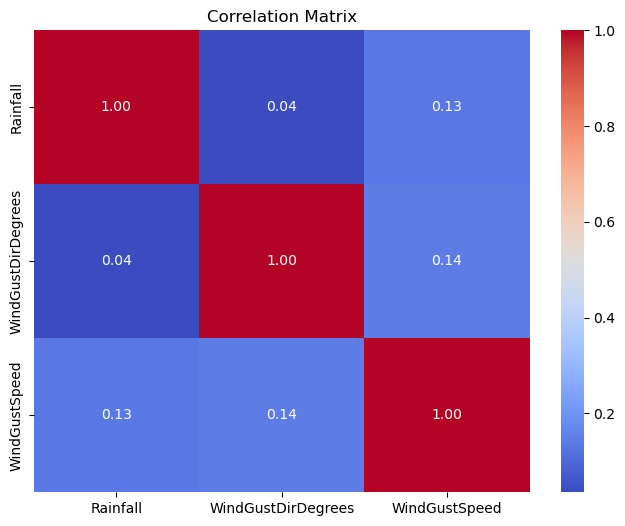

In [11]:
def calcular_y_graficar_correlacion(df, columnas_numericas):

    df_numeric = df[columnas_numericas]
    correlation_matrix = df_numeric.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    return correlation_matrix

columnas_numericas = ['Rainfall', 'WindGustDirDegrees', 'WindGustSpeed']
matriz_correlacion = calcular_y_graficar_correlacion(filtered_dataset, columnas_numericas)

##  Force over lifetime

In [12]:
def limpiar_y_resumir_dataset(df):
    
    df_limpio = df.dropna()

    print("\nDataset después de eliminar filas con valores nulos:")
    print(df_limpio.info())

    return df_limpio

filtered_dataset_clean = limpiar_y_resumir_dataset(filtered_dataset)


Dataset después de eliminar filas con valores nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 132474 entries, 0 to 145458
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rainfall            132474 non-null  float64
 1   WindGustDir         132474 non-null  object 
 2   WindGustSpeed       132474 non-null  float64
 3   WindGustDirDegrees  132474 non-null  float64
dtypes: float64(3), object(1)
memory usage: 5.1+ MB
None


In [13]:
filtered_dataset_clean.head()

,Rainfall,WindGustDir,WindGustSpeed,WindGustDirDegrees
0,0.6,W,44.0,270.0
1,0.0,WNW,44.0,292.5
2,0.0,WSW,46.0,247.5
3,0.0,NE,24.0,45.0
4,1.0,W,41.0,270.0


In [14]:
def convertir_grados_a_radianes(df, columna_grados, columna_radianes):
   
    df[columna_radianes] = np.radians(df[columna_grados])
    return df

In [15]:
 
def calcular_componentes_viento(df, columna_velocidad, columna_radianes, columna_x, columna_y):

    df[columna_x] = df[columna_velocidad] * np.sin(df[columna_radianes])
    df[columna_y] = df[columna_velocidad] * np.cos(df[columna_radianes])
    return df

In [16]:
def redondear_columnas(df, columnas, decimales):
    for columna in columnas:
        df[columna] = df[columna].round(decimales)
    return df

In [17]:

filtered_dataset_clean = filtered_dataset_clean.copy()  
filtered_dataset_clean = convertir_grados_a_radianes(filtered_dataset_clean, 'WindGustDirDegrees', 'WindDirRadians')

filtered_dataset_clean = calcular_componentes_viento(
    filtered_dataset_clean, 'WindGustSpeed', 'WindDirRadians', 'WindX', 'WindY'
)
filtered_dataset_clean = redondear_columnas(filtered_dataset_clean, ['WindX', 'WindY'], 6)

In [18]:
filtered_dataset_clean.head()

,Rainfall,WindGustDir,WindGustSpeed,WindGustDirDegrees,WindDirRadians,WindX,WindY
0,0.6,W,44.0,270.0,4.712389,-44.000000,-0.000000
1,0.0,WNW,44.0,292.5,5.105088,-40.650699,16.838071
2,0.0,WSW,46.0,247.5,4.319690,-42.498458,-17.603438
3,0.0,NE,24.0,45.0,0.785398,16.970563,16.970563
4,1.0,W,41.0,270.0,4.712389,-41.000000,-0.000000


In [19]:
def filtrar_columnas(df, columnas_a_filtrar):
    df_filtrado = df[columnas_a_filtrar].copy()
    return df_filtrado

In [20]:
def eliminar_filas_por_valor(df, columna, valor):
    df_sin_valor = df[df[columna] != valor]
    return df_sin_valor

In [21]:
columnas_a_filtrar = ['Rainfall', 'WindX', 'WindY', 'WindGustSpeed']
filtered_columns_dataset = filtrar_columnas(filtered_dataset_clean, columnas_a_filtrar)
filtered_columns_dataset = eliminar_filas_por_valor(filtered_columns_dataset, 'Rainfall', 0)

In [22]:
filtered_columns_dataset.head()

,Rainfall,WindX,WindY,WindGustSpeed
0,0.6,-44.000000,-0.000000,44.0
4,1.0,-41.000000,-0.000000,41.0
5,0.2,-51.737254,21.430272,56.0
9,1.4,-28.000000,-0.000000,28.0
11,2.2,11.863186,28.640266,31.0


In [25]:
import pandas as pd

def calcular_emission_rate(df, columna_rainfall, min_emission, max_emission):
    
    min_rainfall = df[columna_rainfall].min()
    max_rainfall = df[columna_rainfall].max()

    df['EmissionRate'] = min_emission + (
        (df[columna_rainfall] - min_rainfall) / (max_rainfall - min_rainfall)
    ) * (max_emission - min_emission)

    return df

In [26]:
min_emission_rate = 500
max_emission_rate = 10000

filtered_columns_dataset = calcular_emission_rate(filtered_columns_dataset, 'Rainfall', min_emission_rate, max_emission_rate)
filtered_columns_dataset[['Rainfall', 'EmissionRate']].head()

,Rainfall,EmissionRate
0,0.6,512.925170
4,1.0,523.265306
5,0.2,502.585034
9,1.4,533.605442
11,2.2,554.285714


In [27]:
filtered_columns_dataset.head()

,Rainfall,WindX,WindY,WindGustSpeed,EmissionRate
0,0.6,-44.000000,-0.000000,44.0,512.925170
4,1.0,-41.000000,-0.000000,41.0,523.265306
5,0.2,-51.737254,21.430272,56.0,502.585034
9,1.4,-28.000000,-0.000000,28.0,533.605442
11,2.2,11.863186,28.640266,31.0,554.285714


In [28]:
def calcular_user_intensity(df, columna_emission, min_emission, max_emission, min_intensity, max_intensity):

    df['UserIntensity'] = ((df[columna_emission] - min_emission) / (max_emission - min_emission)) * \
                          (max_intensity - min_intensity) + min_intensity
    return df

def filtrar_columnas_para_modelo(df, columnas_a_mantener):
    return df[columnas_a_mantener]

def verificar_valores_nulos(df):
    nulos = df.isnull().sum()
    print("\nValores nulos por columna:")
    print(nulos)
    return nulos

In [29]:

min_user_intensity = 0
max_user_intensity = 15
min_emission_rate = 500
max_emission_rate = 10000


filtered_columns_dataset = calcular_user_intensity(
    filtered_columns_dataset, 'EmissionRate', min_emission_rate, max_emission_rate, 
    min_user_intensity, max_user_intensity
)

columns_to_keep = ['Rainfall', 'WindGustSpeed', 'WindX', 'WindY', 'EmissionRate', 'UserIntensity']
filtered_columns_dataset = filtrar_columnas_para_modelo(filtered_columns_dataset, columns_to_keep)


verificar_valores_nulos(filtered_columns_dataset)



Valores nulos por columna:
Rainfall         0
WindGustSpeed    0
WindX            0
WindY            0
EmissionRate     0
UserIntensity    0
dtype: int64


Rainfall         0
WindGustSpeed    0
WindX            0
WindY            0
EmissionRate     0
UserIntensity    0
dtype: int64

In [30]:
filtered_columns_dataset.head()

,Rainfall,WindGustSpeed,WindX,WindY,EmissionRate,UserIntensity
0,0.6,44.0,-44.000000,-0.000000,512.925170,0.020408
4,1.0,41.0,-41.000000,-0.000000,523.265306,0.036735
5,0.2,56.0,-51.737254,21.430272,502.585034,0.004082
9,1.4,28.0,-28.000000,-0.000000,533.605442,0.053061
11,2.2,31.0,11.863186,28.640266,554.285714,0.085714


In [31]:
def obtener_estadisticas_descriptivas(df):

    estadisticas = df.describe()
    print("\nEstadísticas descriptivas del dataset:")
    print(estadisticas)
    return estadisticas

def guardar_dataset_csv(df, nombre_archivo):

    df.to_csv(nombre_archivo, index=False)
    print(f"\nEl dataset ha sido guardado como {nombre_archivo}")

In [32]:
obtener_estadisticas_descriptivas(filtered_columns_dataset)
file_name = 'dataRain.csv'
guardar_dataset_csv(filtered_columns_dataset, file_name)


Estadísticas descriptivas del dataset:
           Rainfall  WindGustSpeed         WindX         WindY  EmissionRate  \
count  47272.000000   47272.000000  47272.000000  47272.000000  47272.000000   
mean       6.526919      41.919741     -8.332619     -5.103640    666.138034   
std       13.055392      14.766851     31.199695     30.107460    337.486334   
min        0.100000       6.000000   -126.000000   -135.000000    500.000000   
25%        0.400000      31.000000    -32.335784    -28.991378    507.755102   
50%        2.000000      41.000000    -10.715136     -7.270985    549.115646   
75%        7.000000      50.000000     17.603438     18.477591    678.367347   
max      367.600000     135.000000    104.000000    124.723737  10000.000000   

       UserIntensity  
count   47272.000000  
mean        0.262323  
std         0.532873  
min         0.000000  
25%         0.012245  
50%         0.077551  
75%         0.281633  
max        15.000000  

El dataset ha sido guardado com